# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Read The dataseet**

In [3]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Dataset Analysis**

In [5]:
data.shape


(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# Choose the Annual Income and spending score column

In [12]:
x = data.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choosing the number of cluster using wcss(within cluster sum of square)**

In [25]:

wcss = []

for i in range(1 , 11):
  kMeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kMeans.fit(x)
  wcss.append(kMeans.inertia_)


print(wcss)


[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


# **Plot an elbow graph**

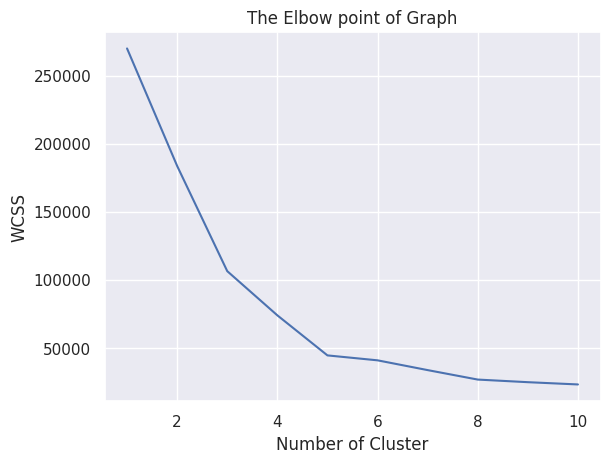

In [27]:
sns.set()
plt.plot(range(1 , 11) , wcss)
plt.title('The Elbow point of Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

We choose 5 number of cluster. Because after 5, there has no significance change in the data

# **Training the K-means Cluster**

In [30]:
kMeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 42)
Y = kMeans.fit_predict(x)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# **Visualize all the cluster and their centroid**

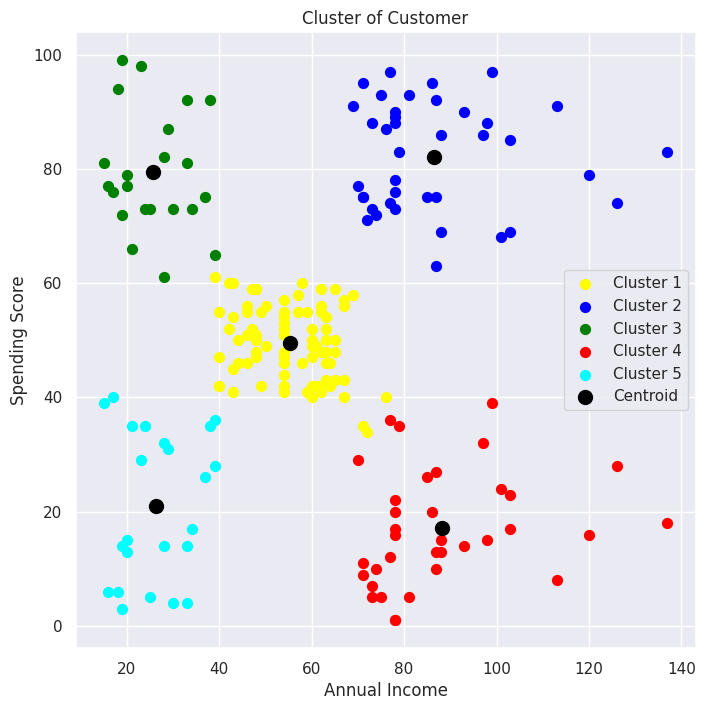

In [35]:
plt.figure(figsize=(8 , 8))
plt.scatter(x[Y == 0 , 0] , x[Y == 0 , 1] , s=50, c = 'yellow' , label = 'Cluster 1')
plt.scatter(x[Y == 1 , 0] , x[Y == 1 , 1] , s=50, c = 'blue' , label = 'Cluster 2')
plt.scatter(x[Y == 2 , 0] , x[Y == 2 , 1] , s=50, c = 'green' , label = 'Cluster 3')
plt.scatter(x[Y == 3 , 0] , x[Y == 3 , 1] , s=50, c = 'red' , label = 'Cluster 4')
plt.scatter(x[Y == 4 , 0] , x[Y == 4 , 1] , s=50, c = 'cyan' , label = 'Cluster 5')


#Plot the centroid
plt.scatter(kMeans.cluster_centers_[: , 0] , kMeans.cluster_centers_[: , 1] , s = 100 , c = 'black' , label = 'Centroid')

plt.title('Cluster of Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Based on the plot, we can see that customers in **cluster 1 (yellow)** have low annual income and low spending score.

Customers in **cluster 2 (blue)** have high annual income and high spending score. Customers in

**cluster 3 (green)** have low annual income and high spending score.

Customers in **cluster 4 (red)** have average annual income and average spending score.

Customers in **cluster 5 (cyan)** have high annual income and low spending score.

------------------------------------------------
**Marketing Strategies:**

Based on the above analysis we can suggest different marketing strategies for different clusters.

**Cluster 1:** These customers are less likely to be high spenders, so marketing strategies should focus on offering discounts or promotions.

**Cluster 2:** These customers are the most valuable as they have high income and high spending score. We should target them with premium products and personalized experience.

**Cluster 3:** These are potential target customers. They like to spend but they have low income. Marketing strategies should focus on offering them affordable products and services.

**Cluster 4:** These are the average customers and they are not very responsive to marketing campaigns.

**Cluster 5:** These are careful customers. They have high income but low spending scores. Marketing strategies should focus on building relationships and trust with these customers.